In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

In [41]:
classes_df = pd.read_csv('../data/elliptic_txs_classes.csv')
edgelist_df = pd.read_csv('../data/elliptic_txs_edgelist.csv')
features_df = pd.read_csv('../data/elliptic_txs_features.csv', header=None)

In [42]:
classes_df.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [43]:
edgelist_df.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [44]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [45]:
classes_df['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [46]:
classes_df['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [47]:
classes_df['class'] = classes_df['class'].replace({'1': 'illicit', '2': 'licit'})
classes_df['class'].value_counts()

unknown    157205
licit       42019
illicit      4545
Name: class, dtype: int64

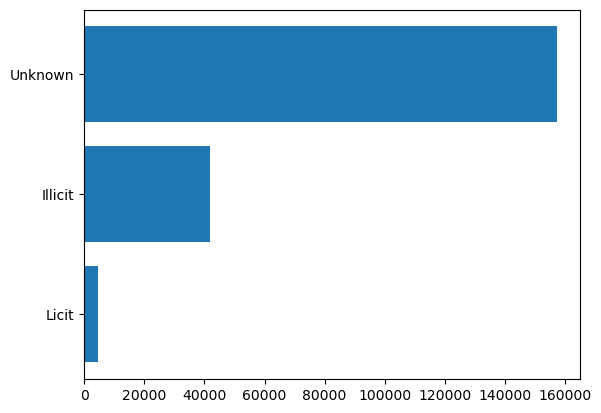

In [48]:
classes_figure = plt.barh(['Licit', 'Illicit', 'Unknown'], classes_df.groupby('class').count()['txId'].values)

In [49]:
features_df.shape, classes_df.shape, edgelist_df.shape

((203769, 167), (203769, 2), (234355, 2))

In [50]:
features_df.columns = ['txId', 'Time step'] + [f'local_feature_{i}' for i in range(93)] + [f'aggregate_feature_{i}' for i in range(72)]

In [51]:
features_df.head()

,txId,Time step,local_feature_0,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,...,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [52]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
txId,203769.0,1.711310e+08,1.104655e+08,1076.000000,8.433452e+07,1.624375e+08,2.454798e+08,4.032446e+08
Time step,203769.0,2.384396e+01,1.517217e+01,1.000000,9.000000e+00,2.300000e+01,3.800000e+01,4.900000e+01
local_feature_0,203769.0,2.454849e-17,1.000002e+00,-0.172983,-1.725317e-01,-1.692045e-01,-1.318553e-01,7.168197e+01
local_feature_1,203769.0,-7.531922e-18,1.000002e+00,-0.210553,-1.803266e-01,-1.328975e-01,-5.524241e-02,7.359505e+01
local_feature_2,203769.0,2.231681e-17,1.000002e+00,-1.756361,-1.201369e+00,4.636092e-01,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
aggregate_feature_67,203769.0,2.231681e-18,1.000002e+00,-0.125939,-8.749016e-02,-8.749016e-02,-8.749016e-02,2.518490e+02
aggregate_feature_68,203769.0,5.244450e-17,1.000002e+00,-0.131155,-1.311553e-01,-1.311553e-01,-8.467423e-02,2.387835e+02
aggregate_feature_69,203769.0,1.562177e-17,1.000002e+00,-0.269818,-1.405971e-01,-9.752359e-02,-9.752359e-02,1.057340e+02
aggregate_feature_70,203769.0,4.072817e-17,1.000002e+00,-1.760926,-1.206134e-01,-1.206134e-01,1.520067e-01,1.519700e+00


In [53]:
features_df["Time step"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

<Axes: title={'center': 'Number of transactions per time step'}, ylabel='Number of transactions'>

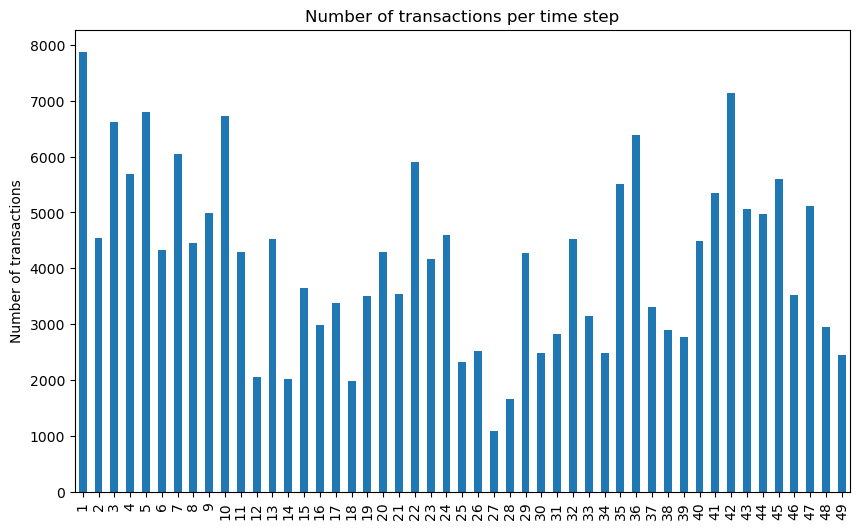

In [54]:
plt.figure(figsize=(10, 6))
plt.title('Number of transactions per time step')
plt.ylabel('Number of transactions')
features_df["Time step"].value_counts().sort_index().plot(kind='bar')

<Axes: >

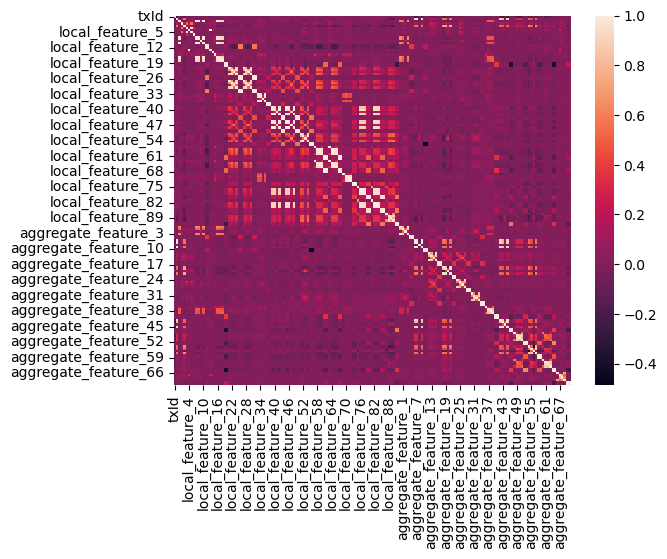

In [55]:
sns.heatmap(features_df.corr())

In [56]:
merged_df = pd.merge(features_df, classes_df, on='txId', how='left')
merged_df.head()

merged_df.to_csv('../data/merged_df.csv', index=False)

Text(0, 0.5, 'Number of transactions')

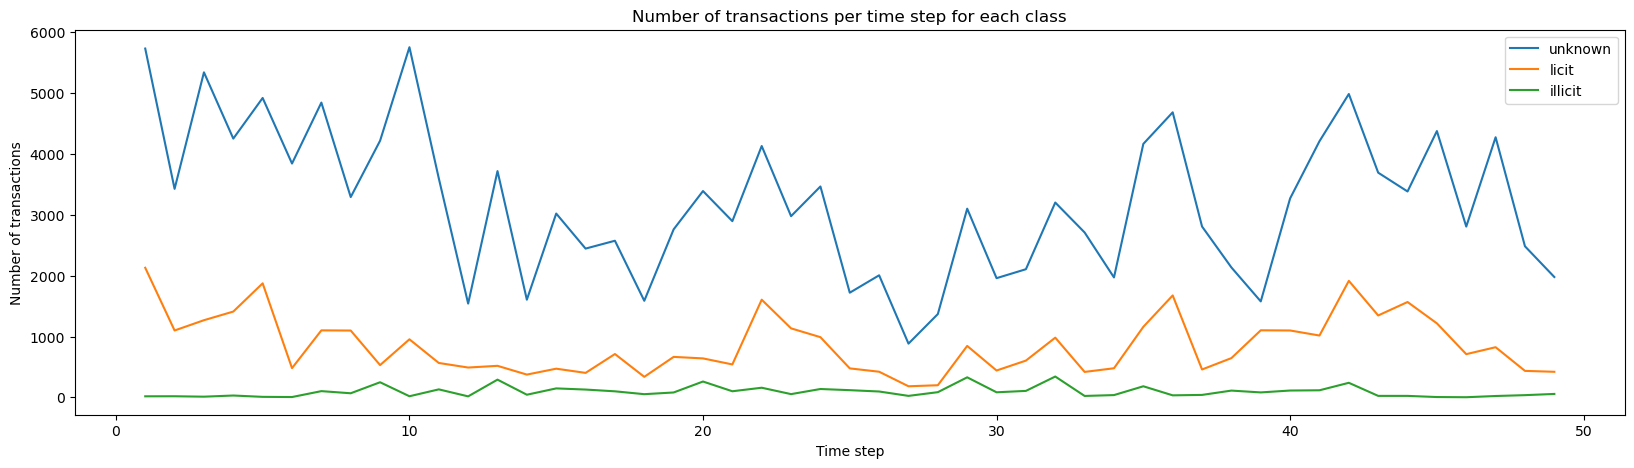

In [57]:
fig, ax = plt.subplots(figsize=(20, 5))
for class_ in classes_df['class'].unique():
    merged_df[merged_df['class'] == class_]['Time step'].value_counts().sort_index().plot(kind='line', ax=ax, label=class_)
plt.legend()
plt.title('Number of transactions per time step for each class')
plt.xlabel('Time step')
plt.ylabel('Number of transactions')

In [70]:
def illicit_ids_graph_timestep(timestep):
    ilicit_ids = merged_df.loc[(merged_df['Time step'] == timestep) & (merged_df['class'] == 'illicit'), 'txId']
    ilicit_edges = edgelist_df.loc[edgelist_df['txId1'].isin(ilicit_ids)]

    graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                    create_using = nx.DiGraph())
    pos = nx.spring_layout(graph)
    plt.title("Illicit transactions graph at time step " + str(timestep))
    nx.draw_networkx(graph, with_labels=False, pos=pos)

In [68]:
def licit_ids_graph_timestep(timestep):
    licit_ids = merged_df.loc[(merged_df['Time step'] == timestep) & (merged_df['class'] == 'licit'), 'txId']
    licit_edges = edgelist_df.loc[edgelist_df['txId1'].isin(licit_ids)]

    graph = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2',
                                    create_using = nx.DiGraph())
    pos = nx.spring_layout(graph)
    plt.title("Licit transactions graph at time step " + str(timestep))
    nx.draw_networkx(graph, with_labels=False, pos=pos)


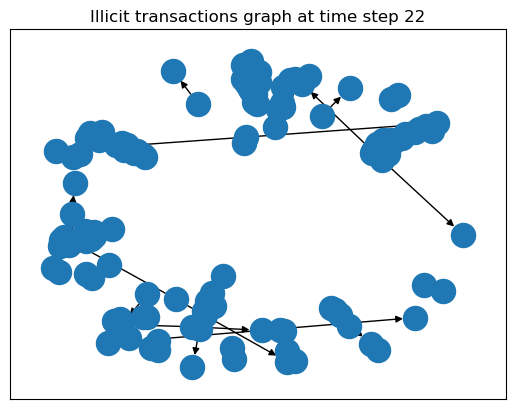

In [75]:
illicit_ids_graph_timestep(22)

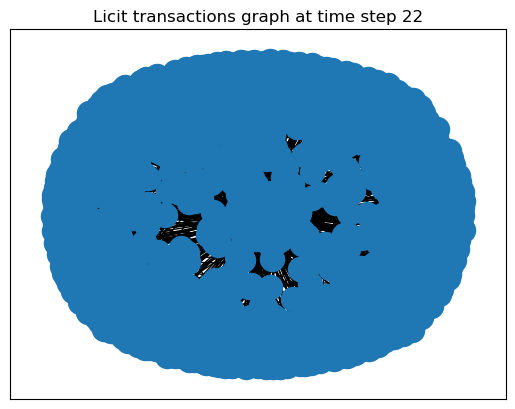

In [76]:
licit_ids_graph_timestep(22)